# TSF GRIP October 2021

## Prediction Using Unsupervised ML

### By- Aakhyat Singh

Importing the libraries required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import datasets

Importing the dataset required

In [2]:
iris=datasets.load_iris()
irisdf=pd.DataFrame(iris.data, columns = iris.feature_names)
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Finding the optimum value of K needed to perform K-Means.

C:\Users\jayan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


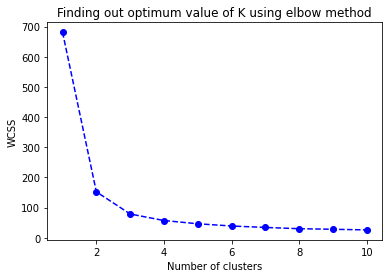

In [4]:
from sklearn.cluster import KMeans
X=irisdf.iloc[:,[0,1,2,3]].values
WCSS=[]
#WCSS=Within Cluster Sum of Squares
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(X)
    WCSS.append(km.inertia_)
#plotting the results to find the elbow which corresponds to the optimum value for k-means
plt.plot(range(1,11),WCSS,'go--',color='blue')
plt.title('Finding out optimum value of K using elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow will always occur at the optimum number of clusters as that is the value of K from where the WCSS (Within Cluster Sum of Squares) doesn't decrease significantly with each iteration.

It is observable from the given graph that the optimum value of K is **3**.

In [5]:
#Creating the k-means classifier.
km=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
Ykm=km.fit_predict(X)

Visualizing the clusters and plotting their centroids

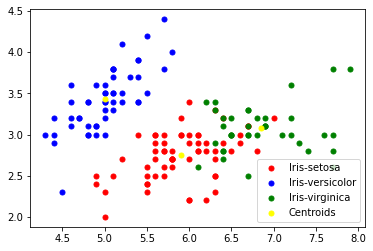

In [6]:
#Iris Setosa Cluster
plt.scatter(X[Ykm==0,0],X[Ykm==0,1],s=25,color='red',label='Iris-setosa')
#Iris Versicolor Cluster
plt.scatter(X[Ykm==1,0],X[Ykm==1,1],s=25,color='blue',label='Iris-versicolor')
#Iris Virginica Cluster
plt.scatter(X[Ykm==2,0],X[Ykm==2,1],s=25,color='green',label='Iris-virginica')
#Centroids of the three clusters
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=25,color='yellow',label='Centroids')
plt.legend()
plt.show()

### Thank You